### Read in data

In [10]:
library(edgeR)
# install.packages("reshape2")
#install.packages("tidyr")
library(reshape2)
#library(tidyverse)

#library(rstatix)
library(tidyr)
library(dplyr)
#library(ggpubr)
library(ggplot2)
library(EnhancedVolcano)
library(countdata)
library(stringr)

In [ ]:
raw_counts = "/DKED/scratch/nadjafn/Atlantic_ASE/nf-potato-ase/results/04_ALLELECOUNTS/Synt_counts_all.tsv"
info = "/DKED/scratch/nadjafn/Atlantic_ASE/nf-potato-ase/results/04_ALLELECOUNTS/Synt_counts_with_info.tsv"

# read in tabel with raw counts
raw_counts = read.table(raw_counts, header = TRUE, sep = "\t")
# read in table with info
info = read.table(info, header = TRUE, sep = "\t")
# merge the two tables on the column "Synt_id"
raw_counts = merge(raw_counts, info, by = "Synt_id")
# set synt_id as rownames
rownames(raw_counts) = raw_counts$Synt_id
# remove the column "Synt_id"
raw_counts = raw_counts[,-1]
# replaace NA values with 0
raw_counts[is.na(raw_counts)] = 0
# filter the genes that have length_category == more_20%_difference and mulitmapping_tag = mulitmapping 
#raw_counts_filter = raw_counts[raw_counts$haplotype_with_longest_annotation == "equal_lengths" & raw_counts$multimapping_tag != "multimapping",]
raw_counts_filter = raw_counts[raw_counts$length_category != "more_20%_difference" & raw_counts$multi_ratio <= 0.20,]
# get the sample columns starting with SRR
sample_columns = colnames(raw_counts_filter)[grep("SRR", colnames(raw_counts_filter))]
# only keeep the columns with the sample names
raw_counts_filter = raw_counts_filter[, sample_columns]
raw_counts = raw_counts[, sample_columns]
# Filter the counts to make sure that for each tissue they have at least 20 counts
leaf_samples = colnames(raw_counts_filter)[grep("leaf", colnames(raw_counts_filter))]
tuber_samples = colnames(raw_counts_filter)[grep("tuber", colnames(raw_counts_filter))]
raw_counts_filter = raw_counts_filter[rowSums(raw_counts_filter[,leaf_samples]) > 10 & rowSums(raw_counts_filter[,tuber_samples]) > 10,]
dim(raw_counts)
# raw counts for synt 261
raw_counts_filter["261",]



[1] 7638   40

,SRR14993892_leaf_1,SRR14993892_leaf_2,SRR14993892_leaf_3,SRR14993892_leaf_4,SRR14993893_leaf_1,SRR14993893_leaf_2,SRR14993893_leaf_3,SRR14993893_leaf_4,SRR14993894_leaf_1,SRR14993894_leaf_2,⋯,SRR14995034_tuber_3,SRR14995034_tuber_4,SRR14995933_tuber_1,SRR14995933_tuber_2,SRR14995933_tuber_3,SRR14995933_tuber_4,SRR14996168_leaf_1,SRR14996168_leaf_2,SRR14996168_leaf_3,SRR14996168_leaf_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
261,0,0,0,14,0,0,0,2,0,0,⋯,0,13,48,0,0,20,0,0,0,57


Synt_id,X1,X2,X3,X4,num_reads_multi,multi_ratio,allele_ratio_hap1,allele_ratio_hap2,allele_ratio_hap3,allele_ratio_hap4,multimapping_tag,ref_length_1G,ref_length_2G,ref_length_3G,ref_length_4G,haplotype_id,length_category,haplotype_with_longest_annotation
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
14,9,12,28,11,5,0.08333333,0.15000000,0.20000000,0.466666667,0.1833333333,multimapping,291,243,266,288,no_syntelog_chr01_1G_x|Soltu.Atl_v3.01_1G001980.1|Soltu.Atl_v3.01_1G001980no_syntelog_chr01_2G_x|Soltu.Atl_v3.01_2G001960.1|Soltu.Atl_v3.01_2G001960no_syntelog_chr01_3G_x|Soltu.Atl_v3.01_3G001860.1|Soltu.Atl_v3.01_3G001860no_syntelog_chr01_4G_x|Soltu.Atl_v3.01_4G002050.1|Soltu.Atl_v3.01_4G002050,more_10%_difference,1G
24,0,0,101,30,366,2.79389313,0.00000000,0.00000000,0.770992366,0.2290076336,multimapping,582,582,543,542,no_syntelog_chr01_1G_x|Soltu.Atl_v3.01_1G032130.1|Soltu.Atl_v3.01_1G032130no_syntelog_chr01_2G_x|Soltu.Atl_v3.01_2G037730.1|Soltu.Atl_v3.01_2G037730no_syntelog_chr01_3G_x|Soltu.Atl_v3.01_3G033820.1|Soltu.Atl_v3.01_3G033820no_syntelog_chr01_4G_x|Soltu.Atl_v3.01_4G036020.1|Soltu.Atl_v3.01_4G036020,more_5%_difference,1G
26,18,0,0,2,0,0.00000000,0.90000000,0.00000000,0.000000000,0.1000000000,unique,995,567,594,555,no_syntelog_chr01_1G_x|hap1_Soltu.DM.04G015380.4|hap1_Soltu.DM.04G015380no_syntelog_chr03_2G_x|hap2_Soltu.DM.04G015380.4|hap2_Soltu.DM.04G015380no_syntelog_chr09_3G_x|hap3_Soltu.DM.04G015380.4|hap3_Soltu.DM.04G015380no_syntelog_chr03_4G_x|hap4_Soltu.DM.04G015380.4|hap4_Soltu.DM.04G015380,more_20%_difference,1G
38,199,293,1785,1,4965,2.17954346,0.08735733,0.12862160,0.783582090,0.0004389816,multimapping,204,204,204,203,no_syntelog_chr09_1G_x|hap1_Soltu.DM.03G006900.1|hap1_Soltu.DM.03G006900no_syntelog_chr02_2G_x|hap2_Soltu.DM.03G006900.1|hap2_Soltu.DM.03G006900no_syntelog_chr05_3G_x|hap3_Soltu.DM.03G006900.1|hap3_Soltu.DM.03G006900no_syntelog_chr05_4G_x|hap4_Soltu.DM.03G006900.1|hap4_Soltu.DM.03G006900,less_1%_difference,1G
44,147,198,108,190,228,0.35458787,0.22861586,0.30793157,0.167962675,0.2954898911,multimapping,1836,1873,1581,1867,Synt_1_chr01_1G_x3|hap1_Soltu.DM.01G000010.4|Soltu.Atl_v3.01_1G000020Synt_1_chr01_2G_x3|hap2_Soltu.DM.01G000010.4|Soltu.Atl_v3.01_2G000020Synt_1_chr01_3G_x3|hap3_Soltu.DM.01G000010.4|Soltu.Atl_v3.01_3G000040no_syntelog_chr01_4G_x|hap4_Soltu.DM.01G000010.4|Soltu.Atl_v3.01_4G000010,more_10%_difference,2G
45,159,0,153,1,462,1.47603834,0.50798722,0.00000000,0.488817891,0.0031948882,multimapping,1832,1812,1840,1812,Synt_2_chr01_1G_x4|hap1_Soltu.DM.01G000030.1|Soltu.Atl_v3.01_1G000040Synt_2_chr01_2G_x4|hap2_Soltu.DM.01G000030.1|Soltu.Atl_v3.01_2G000040Synt_2_chr01_3G_x4|hap3_Soltu.DM.01G000030.1|Soltu.Atl_v3.01_3G000080Synt_2_chr01_4G_x4|hap4_Soltu.DM.01G000030.1|Soltu.Atl_v3.01_4G000050,more_1%_difference,3G
46,26,23,78,9,177,1.30147059,0.19117647,0.16911765,0.573529412,0.0661764706,multimapping,1051,1059,1050,1061,Synt_3_chr01_1G_x4|hap1_Soltu.DM.01G000040.1|Soltu.Atl_v3.01_1G000050Synt_3_chr01_2G_x4|hap2_Soltu.DM.01G000040.1|Soltu.Atl_v3.01_2G000050Synt_3_chr01_3G_x4|hap3_Soltu.DM.01G000040.1|Soltu.Atl_v3.01_3G000090Synt_3_chr01_4G_x4|hap4_Soltu.DM.01G000040.1|Soltu.Atl_v3.01_4G000060,more_1%_difference,4G
47,141,3,80,2,407,1.80088496,0.62389381,0.01327434,0.353982301,0.0088495575,multimapping,3572,3542,3584,3542,Synt_4_chr01_1G_x4|hap1_Soltu.DM.01G000050.1|Soltu.Atl_v3.01_1G000060Synt_4_chr01_2G_x4|hap2_Soltu.DM.01G000050.1|Soltu.Atl_v3.01_2G000060Synt_4_chr01_3G_x4|hap3_Soltu.DM.01G000050.1|Soltu.Atl_v3.01_3G000110Synt_4_chr01_4G_x4|hap4_Soltu.DM.01G000050.1|Soltu.Atl_v3.01_4G000070,more_1%_difference,3G
48,93,4309,60,2013,5692,0.87907336,0.01436293,0.66548263,0.009266409,0.3108880309,multimapping,2391,2531,2392,2393,Synt_5_chr01_1G_x7|hap1_Soltu.DM.01G000060.5|Soltu.Atl_v3.01_1G000070Synt_5_chr01_2G_x7|hap2_Soltu.DM.01G000060.5|Soltu.Atl_v3.01_2G000070Synt_5_chr01_3G_x7|hap3_Soltu.DM.01G000060.5|Soltu.Atl_v3.0

### T-test


### Beta-Bionomial test

Sum the count within each sample

In [41]:
# Define the list of allele suffixes
allele_suffixes <- c("_1", "_2", "_3", "_4")

# Create a copy of raw_counts_filter for modifications
raw_counts_filter_bionom <- raw_counts_filter

raw_counts_filter_bionom$Synt_ids <- rownames(raw_counts_filter_bionom)
# Assume `raw_counts_filter_bionom` has the processed data with columns: Synt_id, base_variable, allele counts
# Convert the data to long format
melted_table <- raw_counts_filter_bionom %>%
  pivot_longer(
    cols = starts_with("SRR"), # Adjust column name pattern if needed
    names_to = "variable",
    values_to = "value"
  )

# Extract allele information (_1, _2, _3, _4) from the variable names
melted_table <- melted_table %>%
  mutate(
    allele = case_when(
      str_detect(variable, "_1$") ~ "allele_1",
      str_detect(variable, "_2$") ~ "allele_2",
      str_detect(variable, "_3$") ~ "allele_3",
      str_detect(variable, "_4$") ~ "allele_4",
      TRUE ~ NA_character_
    )
  )

# Remove rows where allele is NA (if any)
melted_table <- melted_table %>%
  filter(!is.na(allele))

# Replace `_1`, `_2`, `_3`, `_4` suffixes in the 'variable' column to create 'base_variable'
melted_table <- melted_table %>%
  mutate(base_variable = str_remove(variable, "_[1234]$"))
melted_table

# Pivot the table to have alleles as columns and genes + samples as rows
pivoted_table <- melted_table %>%
  pivot_wider(
    id_cols = c(Synt_ids, base_variable), # Rows: gene (Synt_id) and sample (base_variable)
    names_from = allele,                # Columns: alleles
    values_from = value                 # Values: counts
  )


# add a column with the sum of the counts for each gene
pivoted_table$sum_counts = rowSums(pivoted_table[,grep("allele", colnames(pivoted_table))])

# Display the pivoted table
print(pivoted_table)


Synt_ids,variable,value,allele,base_variable
<chr>,<chr>,<dbl>,<chr>,<chr>
14,SRR14993892_leaf_1,0,allele_1,SRR14993892_leaf
14,SRR14993892_leaf_2,0,allele_2,SRR14993892_leaf
14,SRR14993892_leaf_3,1,allele_3,SRR14993892_leaf
14,SRR14993892_leaf_4,2,allele_4,SRR14993892_leaf
14,SRR14993893_leaf_1,0,allele_1,SRR14993893_leaf
14,SRR14993893_leaf_2,1,allele_2,SRR14993893_leaf
14,SRR14993893_leaf_3,0,allele_3,SRR14993893_leaf
14,SRR14993893_leaf_4,0,allele_4,SRR14993893_leaf
14,SRR14993894_leaf_1,2,allele_1,SRR14993894_leaf


# A tibble: 18,260 × 7
   Synt_ids base_variable     allele_1 allele_2 allele_3 allele_4 sum_counts
   <chr>    <chr>                <dbl>    <dbl>    <dbl>    <dbl>      <dbl>
 1 14       SRR14993892_leaf         0        0        1        2          3
 2 14       SRR14993893_leaf         0        1        0        0          1
 3 14       SRR14993894_leaf         2        1        5        2         10
 4 14       SRR14993895_leaf         1        1        6        0          8
 5 14       SRR14995031_tuber        0        3        2        0          5
 6 14       SRR14995032_tuber        0        2        2        0          4
 7 14       SRR14995033_tuber        2        1        3        2          8
 8 14       SRR14995034_tuber        1        1        0        2          4
 9 14       SRR14995933_tuber        1        1        4        3          9
10 14       SRR14996168_leaf         2        1        5        0          8
# ℹ 18,250 more rows


#### Test

## Testing

Synt_ids,variable,value,allele,base_variable
<chr>,<chr>,<dbl>,<fct>,<chr>
261,SRR14993892_leaf_1,0,allele_1,SRR14993892_leaf
261,SRR14993892_leaf_2,0,allele_2,SRR14993892_leaf
261,SRR14993892_leaf_3,0,allele_3,SRR14993892_leaf
261,SRR14993892_leaf_4,14,allele_4,SRR14993892_leaf
261,SRR14993893_leaf_1,0,allele_1,SRR14993893_leaf
261,SRR14993893_leaf_2,0,allele_2,SRR14993893_leaf
261,SRR14993893_leaf_3,0,allele_3,SRR14993893_leaf
261,SRR14993893_leaf_4,2,allele_4,SRR14993893_leaf
261,SRR14993894_leaf_1,0,allele_1,SRR14993894_leaf


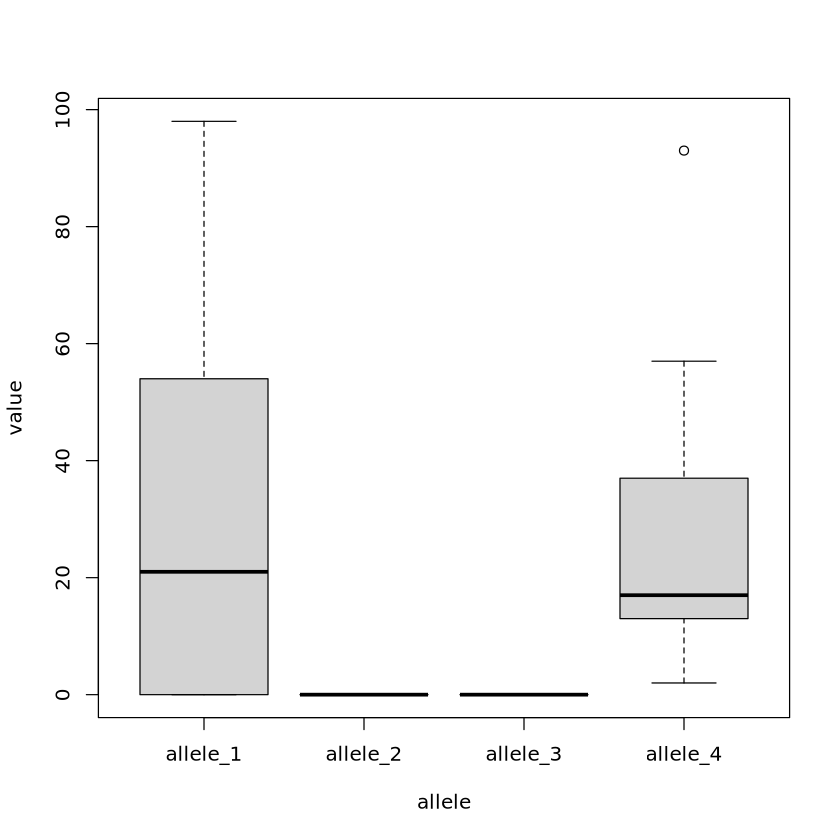

In [ ]:
# select one gene
gene = "261"

melted_table$allele = as.factor(melted_table$allele)
# select the columns with the allele counts
melted_table_gene = melted_table[melted_table$Synt_ids == gene,]

grouped = group_by(melted_table_gene, allele ) %>%
  summarise(
    count = n(),
    mean = mean(value, na.rm = TRUE),
    sd = sd(value, na.rm = TRUE),
    median = median(value, na.rm = TRUE),
    IQR = IQR(value, na.rm = TRUE)
  )
plot(value ~ allele, data = melted_table_gene)

In [50]:
kruskal.test(value ~ allele, data = melted_table_gene)


	Kruskal-Wallis rank sum test

data:  value by allele
Kruskal-Wallis chi-squared = 23.759, df = 3, p-value = 2.805e-05
